In [53]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import plotly.express as px
import seaborn as sns

    

In [54]:
from dateutil.parser import parse 

In [55]:
df = pd.read_csv("Downloads/data_w_genres.csv")

In [56]:
df.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


In [57]:
df1=pd.read_csv("Downloads/data_by_genres.csv")

In [58]:
df1.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [59]:
df2=pd.read_csv("Downloads/data_by_year.csv")

In [60]:
df2.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1
3,1924,0.935575,0.548654,188461.649789,0.347033,0.583955,0.237875,-14.202304,0.090210,120.653359,0.668574,0.603376,10,1
4,1925,0.965422,0.571890,184130.699620,0.264373,0.408893,0.243094,-14.516707,0.115457,115.671715,0.616430,2.707224,5,1


In [61]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])

In [62]:
X = df1.select_dtypes(np.number)

In [63]:
cluster_pipeline.fit(X)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])

In [64]:
df1['cluster'] = cluster_pipeline.predict(X)

In [65]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])

In [66]:
genre_embedding = tsne_pipeline.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2664 samples in 0.145s...
[t-SNE] Computed neighbors for 2664 samples in 0.452s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2664
[t-SNE] Computed conditional probabilities for sample 2000 / 2664
[t-SNE] Computed conditional probabilities for sample 2664 / 2664
[t-SNE] Mean sigma: 0.792505
[t-SNE] Computed conditional probabilities in 0.311s
[t-SNE] Iteration 50: error = 80.6410141, gradient norm = 0.0031250 (50 iterations in 2.058s)
[t-SNE] Iteration 100: error = 75.5284271, gradient norm = 0.0090969 (50 iterations in 1.437s)
[t-SNE] Iteration 150: error = 75.0547485, gradient norm = 0.0039558 (50 iterations in 1.372s)
[t-SNE] Iteration 200: error = 74.9820404, gradient norm = 0.0005662 (50 iterations in 1.571s)
[t-SNE] Iteration 250: error = 74.9772339, gradient norm = 0.0010004 (50 iterations in 1.502s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.977234
[t-SNE] Iteration 300: erro

In [69]:
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = df1['genres']
projection['cluster'] = df1['cluster']

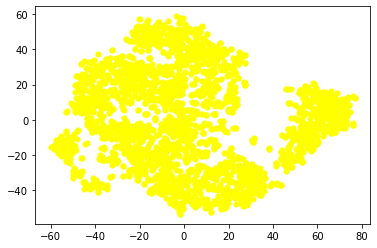

In [74]:
fig = plt.scatter( projection.x, projection.y, c='yellow',linewidths=0.1 )